In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
import imp
import numpy as np
from scipy import constants

import lsst.daf.persistence as daf_persistence
from lsst.sims.photUtils import Bandpass, PhotometricParameters
from lsst.utils import getPackageDir

In [3]:
def look(img, range=None, x_range=None, y_range=None):
    """Simple function to wrap matplotlib and display an image with a colorbar."""
    plt.figure(figsize=(16, 6))
    if range is None:
        range = [np.min(img), np.max(img)]
    img_use = np.clip(img, range[0], range[1])
    if x_range is not None:
        x0 = int(x_range[0])
        x1 = int(x_range[1])
        if x0 < 0:
            img_use = np.roll(img_use, -x0, axis=1)
            x1 -= x0
            x0 = 0
        img_use = img_use[:, x0: x1]
    if y_range is not None:
        y0 = int(y_range[0])
        y1 = int(y_range[1])
        if y0 < 0:
            img_use = np.roll(img_use, -y0, axis=0)
            y1 -= y0
            y0 = 0
        img_use = img_use[y0: y1, :]
    fig_show = plt.imshow(img_use, interpolation='none', origin='lower', cmap=cm.rainbow)
    plt.colorbar(fig_show, orientation='vertical', shrink=1)
#    cbar.set_label('DCR (arcsec)', labelpad=0)
    plt.show()

In [4]:
repository = "/Users/sullivan/LSST/simulations/test6/output_data"
obsid_range = [200, 224, 3]
band_name = "g"

In [5]:
imp.load_source('dcr_template', '/Users/sullivan/LSST/LSST-DCR/experimental_DCR/python/dcr_template.py')
from dcr_template import DcrCorrection

In [6]:
dcr_model_with_psf = DcrCorrection(n_step=3, repository=repository, obsid_range=obsid_range, band_name=band_name,
                                   use_psf=True,use_fft=False,kernel_size=9)

In [ ]:
dcr_model_with_fullpsf = DcrCorrection(n_step=3, repository=repository, obsid_range=obsid_range, band_name=band_name,
                                   use_psf=True,use_fft=False,kernel_size=9)

In [ ]:
dcr_model_no_psf = DcrCorrection(n_step=3, repository=repository, obsid_range=obsid_range, band_name=band_name,
                                   use_psf=False,use_fft=False,kernel_size=9)

In [7]:
dcr_model_with_psf.build_model(use_full=False, use_regularization=True)

Working on column
 0.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 100.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 200.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 300.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 400.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 500.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 600.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 700.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 800.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 900.........|.........|.........|.........|....

In [ ]:
dcr_model_with_fullpsf.build_model(use_full=True, use_regularization=True)

In [ ]:
dcr_model_no_psf.build_model(use_full=False, use_regularization=True)

Working on column
 0.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 100.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 200.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 300.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 400.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 500.........|.........|.........|.........|.........|.........|.........|.........|.........|.........
 600.........|.........|.........|.........|.........|......

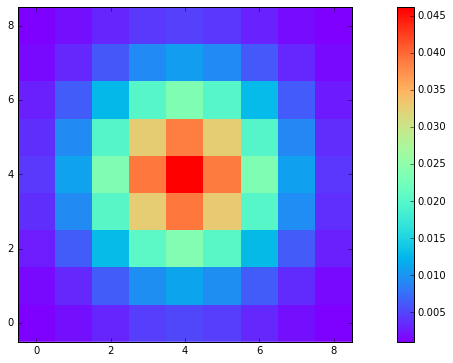

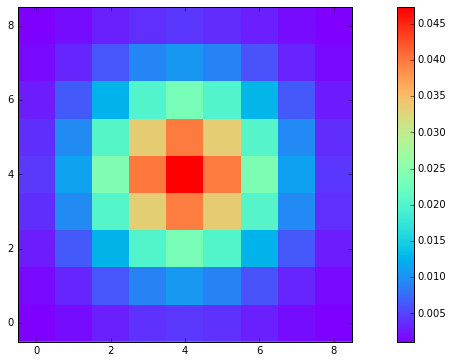

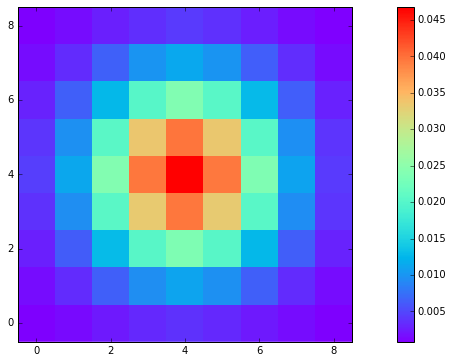

SUM


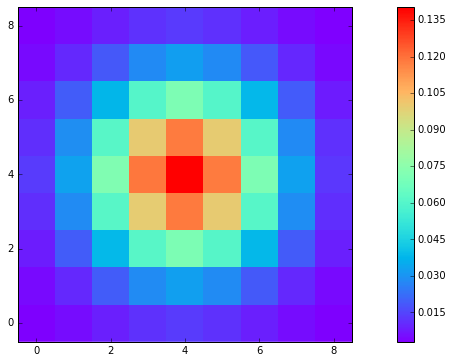

In [8]:
for _i in range(dcr_model_with_psf.n_step):
    look(dcr_model_with_psf.psf_model[_i, :, :])
print("SUM")
look(np.sum(dcr_model_with_psf.psf_model,axis=0))

In [ ]:
for _i in range(dcr_model_no_psf.n_step):
    look(dcr_model_no_psf.model[_i,:,:],x_range=[625+25,670+25], y_range=[815-53,860-53])
    print(np.max(dcr_model_no_psf.model[_i,:,:]))
print("SUM")
look(np.sum(dcr_model_no_psf.model,axis=0),x_range=[625+25,670+25], y_range=[815-53,860-53])

print("DIFF")
look(dcr_model_no_psf.model[2,:,:] - dcr_model_no_psf.model[0,:,:])

In [ ]:
for exp in dcr_model_with_psf.exposures:
    look(exp.getMaskedImage().getImage().getArray(),range=[-1e5,1e5],
         x_range=[625+25,670+25], y_range=[815-53,860-53])

In [9]:
output_directory='/Users/sullivan/LSST/simulations/test6/dcr_with_psf/'
template_exposure_gen = dcr_model_with_psf.generate_templates_from_model(obsid_range=[200,224],output_directory=output_directory)
dcr_model_with_psf_im_arr = []
for exp in template_exposure_gen:
    dcr_model_with_psf_im_arr.append(exp.getMaskedImage().getImage().getArray())
# for im in dcr_model_with_psf_im_arr:
#     look(im, range=[-1e4,1e4])

In [ ]:
output_directory='/Users/sullivan/LSST/simulations/test6/dcr_with_fullpsf/'
template_exposure_gen = dcr_model_with_fullpsf.generate_templates_from_model(obsid_range=[200,224], use_full=True,
                                                                             output_directory=output_directory)
dcr_model_with_fullpsf_im_arr = []
for exp in template_exposure_gen:
    dcr_model_with_fullpsf_im_arr.append(exp.getMaskedImage().getImage().getArray())
# for im in dcr_model_with_psf_im_arr:
#     look(im, range=[-1e4,1e4])

In [ ]:
output_directory='/Users/sullivan/LSST/simulations/test6/dcr_no_psf/'
template_exposure_gen = dcr_model_no_psf.generate_templates_from_model(obsid_range=[200,224],output_directory=output_directory)
dcr_model_no_psf_im_arr = []
for exp in template_exposure_gen:
    dcr_model_no_psf_im_arr.append(exp.getMaskedImage().getImage().getArray())

In [ ]:
dcr_model_with_psf_addnoise = DcrCorrection(n_step=3, repository=repository, obsid_range=obsid_range, band_name=band_name,
                                            use_psf=True,use_fft=False,add_noise=True)
dcr_model_with_psf_addnoise.build_model()

In [ ]:
dcr_model_no_psf_addnoise = DcrCorrection(n_step=3, repository=repository, obsid_range=obsid_range, band_name=band_name,
                                          use_psf=False,use_fft=False,add_noise=True)
dcr_model_no_psf_addnoise.build_model()

In [ ]:
output_directory='/Users/sullivan/LSST/simulations/test6/dcr_with_psf_addnoise/'
template_exposure_gen = dcr_model_with_psf_addnoise.generate_templates_from_model(obsid_range=[200,224],output_directory=output_directory)
dcr_model_with_psf_addnoise_im_arr = []
for exp in template_exposure_gen:
    dcr_model_with_psf_addnoise_im_arr.append(exp.getMaskedImage().getImage().getArray())

In [ ]:
output_directory='/Users/sullivan/LSST/simulations/test6/dcr_no_psf_addnoise/'
template_exposure_gen = dcr_model_no_psf_addnoise.generate_templates_from_model(obsid_range=[200,224],output_directory=output_directory)
dcr_model_no_psf_addnoise_im_arr = []
for exp in template_exposure_gen:
    dcr_model_no_psf_addnoise_im_arr.append(exp.getMaskedImage().getImage().getArray())